In [12]:
import astropy.units as u
import astropy.constants as cons
import matplotlib.pyplot as plt
import numpy as np

In [23]:
mstar=1.*u.Msun.to('kg')*u.kg
mplanet=5*u.Mjup.to('kg')*u.kg
a=2*u.au.to('m')*u.m
distance=5*u.pc
mu=cons.G*(mstar+mplanet)
T=np.sqrt(4*np.pi**2.*a**3./mu)
e=.66
n=2.*np.pi/T
times=np.linspace(0, 3*T, 75)
rs=[]
cosfs=[]
fs=[]
tau=0
Ms=n*(times-tau)

In [24]:
for i in range(len(times)):
    k=0.85
    M=Ms[i]
    E0=M+np.sign(np.sin(M*u.rad))*k*e
    Ei=E0
    for i in range(10):
        fppp=e*np.cos(Ei*u.rad)
        fpp=e*np.sin(Ei*u.rad)
        fp=1.-e*np.cos(Ei*u.rad)
        f=Ei-e*np.sin(Ei*u.rad)-M
        d1=-f/fp
        d2=-f/(fp+.5*d1*fpp)
        d3=-f/(fp+.5*d2*fpp+(1/6.)*d2**2.*fppp)
        Enext=Ei+d3
        Ei=Enext
    cosf=(np.cos(Enext*u.rad)-e)/(1.-e*np.cos(Enext*u.rad))
    cosfs.append(cosf)
    r=a*(1.-e**2.)/(1.+e*cosf)
    rs.append(r)
    f=2.*np.arctan(np.sqrt((1+e)/(1-e))*np.tan(Enext*u.rad/2.))
    fs.append(f)

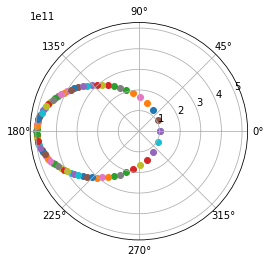

In [39]:
ax=plt.subplot(111, polar=True)
for i, t in enumerate(times):
    ax.scatter(fs[i], rs[i])
plt.show()

In [47]:
f,ax=plt.subplots(1,1)

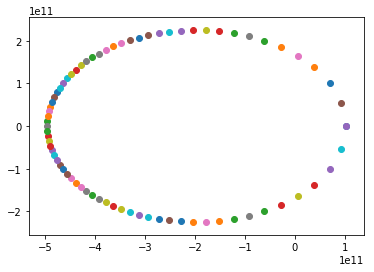

In [48]:
for i, t in enumerate(times):
    ax.scatter(rs[i]*np.cos(fs[i]), rs[i]*np.sin(fs[i]))
plt.show()

In [17]:
[t.to('year') for t in times]

[<Quantity 0.0 yr>,
 <Quantity 0.11755676882824084 yr>,
 <Quantity 0.23511353765648169 yr>,
 <Quantity 0.35267030648472253 yr>,
 <Quantity 0.47022707531296337 yr>,
 <Quantity 0.5877838441412042 yr>,
 <Quantity 0.7053406129694451 yr>,
 <Quantity 0.822897381797686 yr>,
 <Quantity 0.9404541506259267 yr>,
 <Quantity 1.0580109194541676 yr>,
 <Quantity 1.1755676882824084 yr>,
 <Quantity 1.2931244571106493 yr>,
 <Quantity 1.4106812259388901 yr>,
 <Quantity 1.528237994767131 yr>,
 <Quantity 1.645794763595372 yr>,
 <Quantity 1.7633515324236129 yr>,
 <Quantity 1.8809083012518535 yr>,
 <Quantity 1.9984650700800943 yr>,
 <Quantity 2.116021838908335 yr>,
 <Quantity 2.2335786077365762 yr>,
 <Quantity 2.351135376564817 yr>,
 <Quantity 2.468692145393058 yr>,
 <Quantity 2.5862489142212985 yr>,
 <Quantity 2.7038056830495396 yr>,
 <Quantity 2.8213624518777802 yr>]